# FCNN Linear Data Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
file1path = "/Users/rajeshr/Desktop/Courses/Semester 2/CS671/Assignment1/Group22/Classification/LS_Group22/Class1.txt"
file2path = "/Users/rajeshr/Desktop/Courses/Semester 2/CS671/Assignment1/Group22/Classification/LS_Group22/Class2.txt"
file3path = "/Users/rajeshr/Desktop/Courses/Semester 2/CS671/Assignment1/Group22/Classification/LS_Group22/Class3.txt"

In [3]:
def readdata(file1path, file2path, file3path):
    
    class1 = pd.read_csv(file1path, header=None, delimiter=" ")
    class2 = pd.read_csv(file2path, header=None, delimiter=" ")
    class3 = pd.read_csv(file3path, header=None, delimiter=" ")
    
    return class1, class2, class3

In [4]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [5]:
def plotplots(class1, class2, class3):
    
    plt.scatter(class1[0], class1[1])
    plt.scatter(class2[0], class2[1])
    plt.scatter(class3[0], class3[1])
    plt.legend(['Class 1','Class 2','Class 3'])
    plt.title("Input Data")
    plt.show()

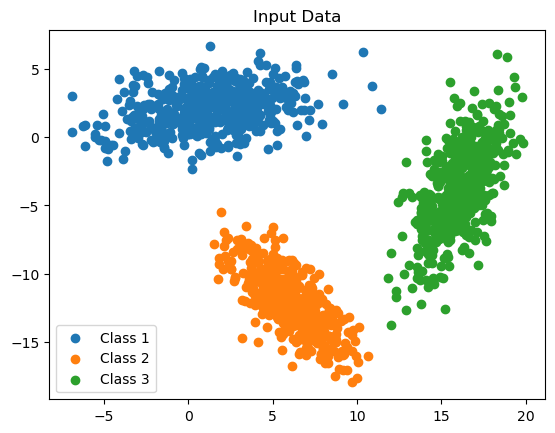

In [6]:
class1, class2, class3 = readdata(file1path, file2path, file3path)
plotplots(class1, class2, class3)

training1, validation1, test1 = split_data(class1)
training2, validation2, test2 = split_data(class2)
training3, validation3, test3 = split_data(class3)

tr1, tr2, tr3 = len(training1), len(training2), len(training3)
v1, v2, v3 = len(validation1), len(validation2), len(validation3)
t1, t2, t3 = len(test1), len(test2), len(test3)

In [7]:
training = training1.append(training2, ignore_index=True)
training = training.append(training3, ignore_index=True)

validation = validation1.append(validation2, ignore_index=True)
validation = validation.append(validation3, ignore_index=True)

test = test1.append(test2, ignore_index=True)
test = test.append(test3, ignore_index=True)

# FCNN Model

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [9]:
def train_data(xn, l1, l2):

    wh = 0.10*np.random.randn(3, 5)
    wo = 0.10*np.random.randn(5, 3)
    avg_err = []
    epoch = 1000
    
    while(epoch):
    
        err = []
        c1, c2, c3 = 0, 0, 0
        
        for i in range(len(xn)):

            xi = [1, xn.iat[i,0], xn.iat[i,1]] #Input layer
            #--------------------------
            h1 = np.dot(wh.T, xi) #hidden layer 1 out
            a1 = sigmoid(h1) #hidden layer 1 activation out
            #--------------------------
            out = np.dot(wo.T, a1) #Output layer out
            ao = sigmoid(out) #Output activation 
            #--------------------------

            if i<l1:
                y = [1, 0, 0]
                en = inst_error(y, ao)
                c1+=1
            elif i>=l1 and i<(l1+l2):
                y = [0, 1, 0]
                en = inst_error(y, ao)
                c2+=1
            else:
                y = [0, 0, 1]
                en = inst_error(y, ao)
                c3+=1
                
                
            err.append(en)
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a1, ((y-ao) * ao * (1-ao))))
            
            var1 = np.dot(wo, ((y-ao) * ao * (1-ao)))
            var2 = a1 * (1-a1)
            
            wh = wh + (neta * np.outer(xi, var1*var2))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%10==0:
            print("ERROR: ",avg_error)
        epoch -= 1
    
    print(c1, c2, c3)
    return wh, wo, avg_err, a1, ao

wh, wo, avg_err, h1_out, o_out = train_data(training, tr1, tr2)

ERROR:  0.31588032744678096
ERROR:  0.06841021801806632
ERROR:  0.03392796299079881
ERROR:  0.021893656016982795
ERROR:  0.015750599031032188
ERROR:  0.01213331348987508
ERROR:  0.009816003094119742
ERROR:  0.008227201131594211
ERROR:  0.0070762178300214406
ERROR:  0.006205832843924813
ERROR:  0.005525246131880398
ERROR:  0.004978750329987345
ERROR:  0.00453038660015477
ERROR:  0.004155950131717585
ERROR:  0.003838569901872262
ERROR:  0.003566135644076701
ERROR:  0.003329733353300103
ERROR:  0.0031226579641697306
ERROR:  0.0029397699111622655
ERROR:  0.0027770638493519093
ERROR:  0.0026313723349958864
ERROR:  0.00250015771225222
ERROR:  0.002381363056202916
ERROR:  0.002273303519484093
ERROR:  0.0021745858646549593
ERROR:  0.0020840480085745827
ERROR:  0.0020007130047355742
ERROR:  0.0019237535953386716
ERROR:  0.001852464605427514
ERROR:  0.0017862412272137294
ERROR:  0.0017245617788758348
ERROR:  0.0016669738980962302
ERROR:  0.0016130833978586574
ERROR:  0.0015625452043993497
ERROR:

In [10]:
def test_data(wh, wo, xn):
    pred_out = []
    for i in range(len(xn)):
        xi = [1, xn.iat[i,0], xn.iat[i,1]]
        h1 = np.dot(wh.T, xi)
        a1 = sigmoid(h1)

        out = np.dot(wo.T, a1) 
        ao = sigmoid(out)
        
        pred_out.append(ao)
        
    return np.round(np.array(pred_out))


In [11]:
max_x_val = int(max([max(class1.iloc[0]), max(class2.iloc[0]), max(class3.iloc[0])]))
min_x_val = int(min([min(class1.iloc[0]), min(class2.iloc[0]), min(class3.iloc[0])]))
max_y_val = int(max([max(class1.iloc[1]), max(class2.iloc[1]), max(class3.iloc[1])]))
min_y_val = int(min([min(class1.iloc[1]), min(class2.iloc[1]), min(class3.iloc[1])]))

In [12]:
all_points = []
for i in range(min_x_val-5, max_x_val+5):
    for j in range(min_y_val-5, max_y_val+5):
        all_points.append([i, j])
        

all_points = pd.DataFrame(all_points)     
#all_points

In [13]:
output = test_data(wh, wo, all_points)

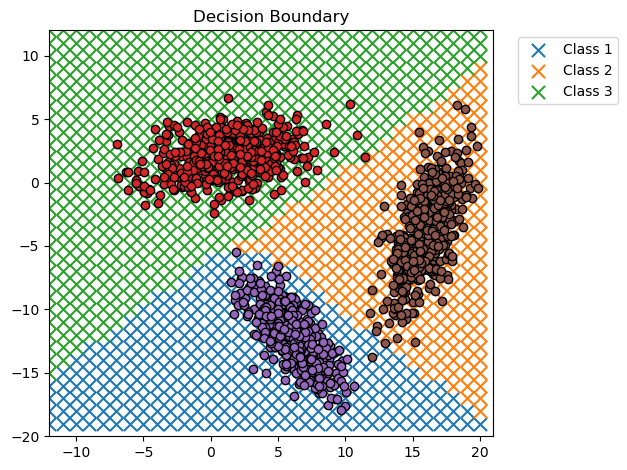

In [14]:
c1x, c2x, c3x = [], [], []
c1y, c2y, c3y = [], [], []

y = output

for i in range(len(all_points)):
        
    if y[i][0] == 1:
        c1x.append(all_points.iloc[i, 0])
        c1y.append(all_points.iloc[i, 1])
    elif y[i][1] == 1:
        c2x.append(all_points.iloc[i, 0])
        c2y.append(all_points.iloc[i, 1])
    else:
        c3x.append(all_points.iloc[i, 0])
        c3y.append(all_points.iloc[i, 1])
    

plt.scatter(c2x, c2y, marker='x', s=90)
plt.scatter(c3x, c3y, marker='x', s=90)
plt.scatter(c1x, c1y, marker='x', s=90)



plt.legend(['Class 2','Class 3', 'Class 1'])
plt.legend(['Class 1','Class 2', 'Class 3'], bbox_to_anchor=(1.04,1), loc="upper left")


plt.scatter(class1[0], class1[1], edgecolors='black')
plt.scatter(class2[0], class2[1], edgecolors='black')
plt.scatter(class3[0], class3[1], edgecolors='black')

plt.title("Decision Boundary")
plt.tight_layout()
plt.savefig("/Users/rajeshr/Desktop/fcnndecisionboundary.png")
plt.xlim(-12, 21)
plt.ylim(-20, 12)

plt.show()

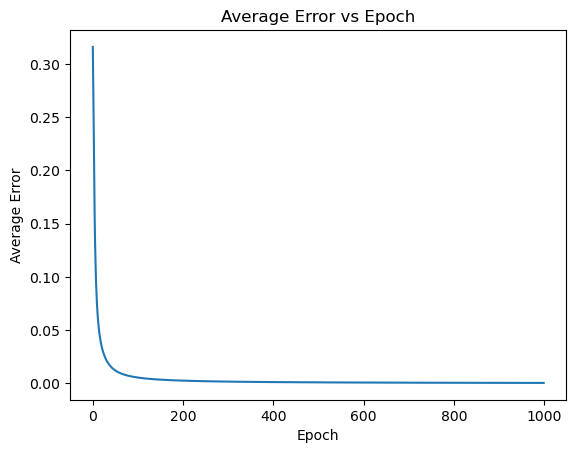

In [15]:
plt.plot(avg_err)
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.savefig("/Users/rajeshr/Desktop/errorvsepoch.png")
plt.show()

In [22]:
def confusion_matrix(yp, l1, l2):
    matrix = 0
    c11, c12, c13, c21, c22, c23, c31, c32, c33 = 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(yp)):
        if i<l1:
            if yp[i][0] == 1:
                c11 += 1
            elif yp[i][1] == 1:
                c12 += 1
            else:
                c13 += 1
        elif i>=l1 and i< (l1+l2):
            if yp[i][1] == 1:
                c22 += 1
            elif yp[i][0] == 1:
                c21 += 1
            else:
                c23 += 1
        else:
            if yp[i][2] == 1:
                c33 += 1
            elif yp[i][0] == 1:
                c31 += 1
            else:
                c32 += 1
    
            
    return [[c11, c12, c13], [c21, c22, c23], [c31, c32, c33]]

In [23]:
yp = test_data(wh, wo, test)
matrix = confusion_matrix(yp, len(test1), len(test2))
[c11, c12, c13], [c21, c22, c23], [c31, c32, c33] = matrix
matrix

[[99, 0, 1], [0, 100, 0], [0, 0, 100]]

In [24]:
yp = test_data(wh, wo, test)
#y = map_class(test, len(test1), len(test2))
matrix = confusion_matrix(yp, len(test1), len(test2))
[c11, c12, c13], [c21, c22, c23], [c31, c32, c33] = matrix
matrix

[[99, 0, 1], [0, 100, 0], [0, 0, 100]]

In [210]:
accuracy = (c11+c22+c33)/((len(test1)+len(test2)+len(test3)))*100
print('Accuracy = {}%'.format(accuracy))

Accuracy = 99.66666666666667%


In [211]:
def function(x, y):
    return x/(x+y)

In [212]:
precision_1 = function(c11/2, c12+c13)
precision_2 = function(c22/2, c21+c23)
precision_3 = function(c33/2, c31+c32)
print('Precision\nClass1 = {}, Class2 = {}, Class3 = {}'.format(precision_1, precision_2, precision_3))

print("Average Precision: ", (precision_1+precision_2+precision_3)/3)

Precision
Class1 = 0.9801980198019802, Class2 = 1.0, Class3 = 1.0
Average Precision:  0.9933993399339934


In [213]:
recall_1 = function(c11/2, c21+c31)
recall_2 = function(c22/2, c12+c32)
recall_3 = function(c33/2, c13+c23)
print('Recall\nClass1 = {}, Class2 = {}, Class3 = {}'.format(precision_1, precision_2, precision_3))

print("Average Recall: ", (recall_1+recall_2+recall_3)/3)

Recall
Class1 = 0.9801980198019802, Class2 = 1.0, Class3 = 1.0
Average Recall:  0.9934640522875817


In [214]:
f_measure1 = (2*precision_1*recall_1)/(precision_1+recall_1)
f_measure2 = (2*precision_2*recall_2)/(precision_2+recall_2)
f_measure3 = (2*precision_3*recall_3)/(precision_1+recall_3)
print('F Score\nClass1 = {}, Class2 = {}, Class3 = {}'.format(f_measure1, f_measure2, f_measure3))

print("Average F-measure: ", (f_measure1+f_measure2+f_measure3)/3)

F Score
Class1 = 0.99, Class2 = 1.0, Class3 = 1.0000990197049213
Average F-measure:  0.9966996732349737
